In [25]:
# Cell 1: Import libraries and load cleaned data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

# Load cleaned data
print("Loading cleaned data...")
matches = pd.read_csv('../data/processed/matches_clean.csv')
deliveries = pd.read_csv('../data/processed/deliveries_clean.csv')

print(f"✅ Matches dataset: {matches.shape[0]} rows, {matches.shape[1]} columns")
print(f"✅ Deliveries dataset: {deliveries.shape[0]} rows, {deliveries.shape[1]} columns")

Loading cleaned data...
✅ Matches dataset: 1095 rows, 20 columns
✅ Deliveries dataset: 260920 rows, 17 columns


In [26]:
# Import helper functions
import sys
sys.path.append('../src')  # Go up one level from notebooks folder
from h2h_analysis import get_h2h_record, get_all_h2h_matrix

# Analyze and visualize major team rivalries
import matplotlib.pyplot as plt

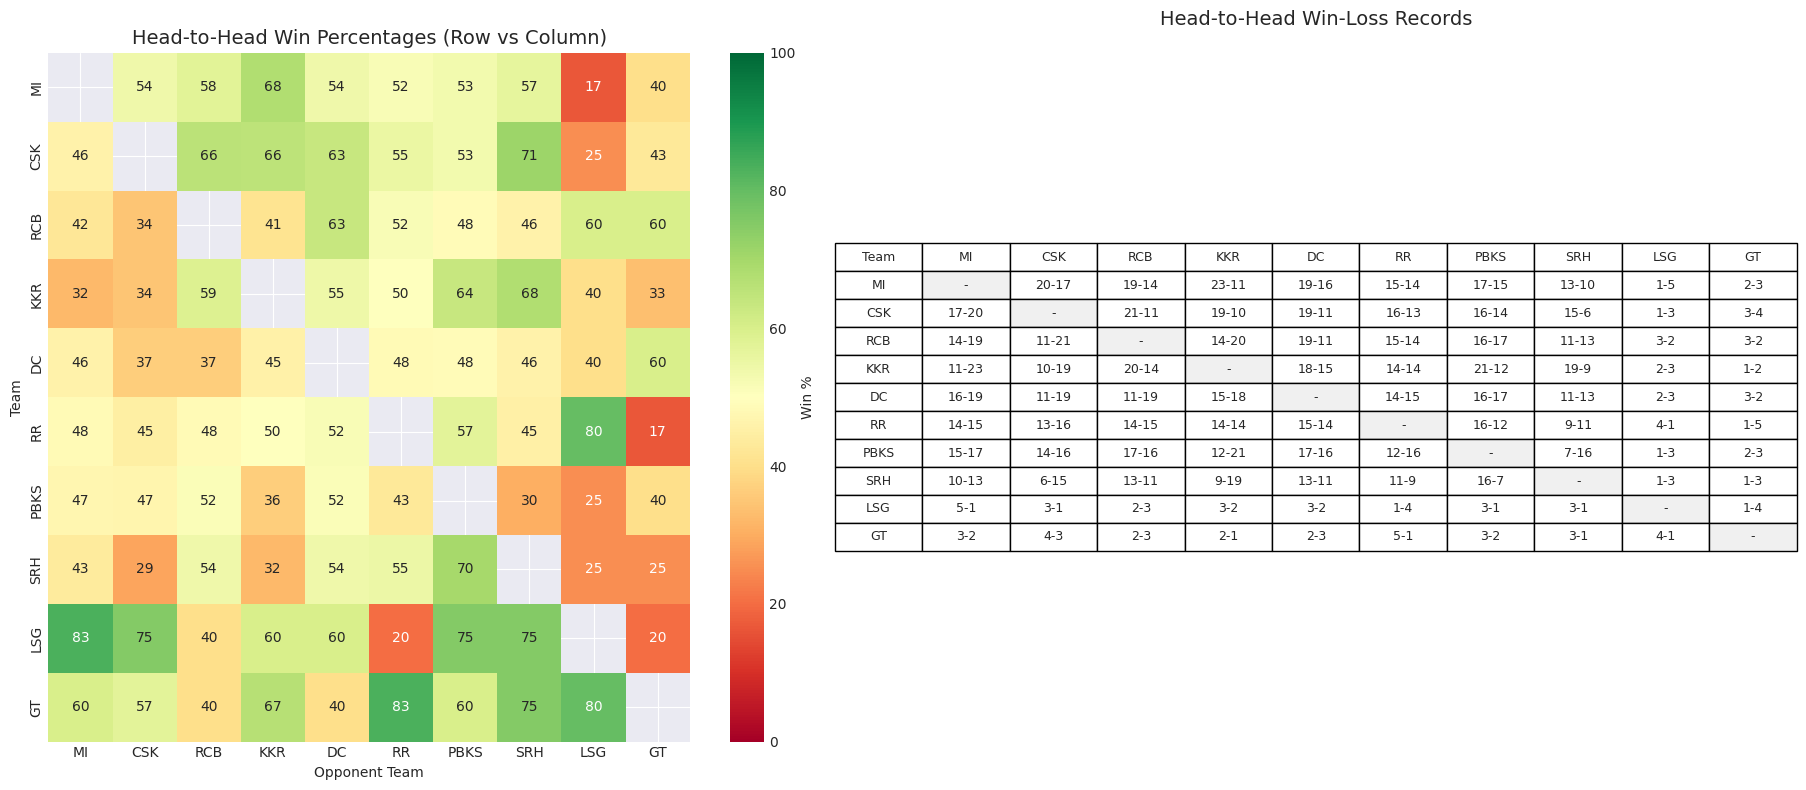


HEAD-TO-HEAD SUMMARY STATISTICS
MI    | Matches: 234 | W-L: 129-105 | Win%: 55.1%
CSK   | Matches: 220 | W-L: 127- 92 | Win%: 58.0%
RCB   | Matches: 228 | W-L: 106-119 | Win%: 47.1%
KKR   | Matches: 227 | W-L: 116-111 | Win%: 51.1%
DC    | Matches: 225 | W-L:  99-125 | Win%: 44.2%
RR    | Matches: 205 | W-L: 100-103 | Win%: 49.3%
PBKS  | Matches: 221 | W-L:  97-124 | Win%: 43.9%
SRH   | Matches: 171 | W-L:  80- 91 | Win%: 46.8%
LSG   | Matches:  44 | W-L:  24- 19 | Win%: 55.8%
GT    | Matches:  45 | W-L:  28- 17 | Win%: 62.2%

 MOST DOMINANT H2H RECORDS:
• CSK over SRH: 15-6 (71.4% in 21 matches)
• SRH over PBKS: 16-7 (69.6% in 23 matches)
• KKR over SRH: 19-9 (67.9% in 28 matches)
• MI over KKR: 23-11 (67.6% in 34 matches)
• CSK over RCB: 21-11 (65.6% in 32 matches)


In [27]:
# Cell 3: Create H2H matrix for all currently active IPL teams
import matplotlib.pyplot as plt
import seaborn as sns

# Current active IPL teams (as of 2024)
active_teams = [
    'Mumbai Indians',
    'Chennai Super Kings', 
    'Royal Challengers Bengaluru',  # Updated name
    'Kolkata Knight Riders',
    'Delhi Capitals',  # Updated from Daredevils
    'Rajasthan Royals',
    'Punjab Kings',  # Updated from Kings XI Punjab
    'Sunrisers Hyderabad',
    'Lucknow Super Giants',
    'Gujarat Titans'
]

# Create H2H matrix for active teams only
h2h_data = []
for team1 in active_teams:
    row = []
    for team2 in active_teams:
        if team1 == team2:
            row.append(np.nan)  # Use NaN for diagonal
        else:
            h2h = get_h2h_record(team1, team2, matches)
            if h2h and h2h['total_matches'] > 0:
                # Calculate win percentage for team1
                win_pct = h2h[f'{team1}_win_pct']
                row.append(win_pct)
            else:
                row.append(0)  # No matches played
    h2h_data.append(row)

# Create DataFrame
h2h_df = pd.DataFrame(h2h_data, index=active_teams, columns=active_teams)

# Create abbreviations for better display
team_abbr = {
    'Mumbai Indians': 'MI',
    'Chennai Super Kings': 'CSK',
    'Royal Challengers Bengaluru': 'RCB',
    'Kolkata Knight Riders': 'KKR',
    'Delhi Capitals': 'DC',
    'Rajasthan Royals': 'RR',
    'Punjab Kings': 'PBKS',
    'Sunrisers Hyderabad': 'SRH',
    'Lucknow Super Giants': 'LSG',
    'Gujarat Titans': 'GT'
}

h2h_df_abbr = h2h_df.rename(index=team_abbr, columns=team_abbr)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Heatmap of win percentages
ax1 = axes[0]
sns.heatmap(h2h_df_abbr, annot=True, fmt='.0f', cmap='RdYlGn', 
            center=50, vmin=0, vmax=100, ax=ax1,
            cbar_kws={'label': 'Win %'})
ax1.set_title('Head-to-Head Win Percentages (Row vs Column)', fontsize=14)
ax1.set_xlabel('Opponent Team')
ax1.set_ylabel('Team')

# Create win-loss record matrix
h2h_records = []
for team1 in active_teams:
    row = []
    for team2 in active_teams:
        if team1 == team2:
            row.append('-')
        else:
            h2h = get_h2h_record(team1, team2, matches)
            if h2h and h2h['total_matches'] > 0:
                row.append(f"{h2h[f'{team1}_wins']}-{h2h[f'{team2}_wins']}")
            else:
                row.append('0-0')
    h2h_records.append(row)

h2h_records_df = pd.DataFrame(h2h_records, index=team_abbr.values(), columns=team_abbr.values())

# Display records as text annotations
ax2 = axes[1]
ax2.axis('tight')
ax2.axis('off')
table_data = []
for idx, team in enumerate(h2h_records_df.index):
    row_data = [team] + h2h_records_df.iloc[idx].tolist()
    table_data.append(row_data)

table = ax2.table(cellText=table_data,
                  colLabels=['Team'] + list(h2h_records_df.columns),
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)
ax2.set_title('Head-to-Head Win-Loss Records', fontsize=14, pad=20)

# Color diagonal cells
for i in range(len(team_abbr)):
    table[(i+1, i+1)].set_facecolor('#f0f0f0')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*60)
print("HEAD-TO-HEAD SUMMARY STATISTICS")
print("="*60)

for team in active_teams:
    team_h2h_wins = 0
    team_h2h_losses = 0
    team_h2h_matches = 0
    
    for opponent in active_teams:
        if team != opponent:
            h2h = get_h2h_record(team, opponent, matches)
            if h2h:
                team_h2h_wins += h2h[f'{team}_wins']
                team_h2h_losses += h2h[f'{opponent}_wins']
                team_h2h_matches += h2h['total_matches']
    
    if team_h2h_matches > 0:
        win_pct = (team_h2h_wins / (team_h2h_wins + team_h2h_losses)) * 100
        print(f"{team_abbr[team]:5} | Matches: {team_h2h_matches:3} | W-L: {team_h2h_wins:3}-{team_h2h_losses:3} | Win%: {win_pct:.1f}%")

# Find most dominant and weakest matchups
print("\n MOST DOMINANT H2H RECORDS:")
dominance = []
for team1 in active_teams:
    for team2 in active_teams:
        if team1 != team2:
            h2h = get_h2h_record(team1, team2, matches)
            if h2h and h2h['total_matches'] >= 10:  # Minimum 10 matches
                dominance.append({
                    'matchup': f"{team_abbr[team1]} over {team_abbr[team2]}",
                    'record': f"{h2h[f'{team1}_wins']}-{h2h[f'{team2}_wins']}",
                    'win_pct': h2h[f'{team1}_win_pct'],
                    'matches': h2h['total_matches']
                })

dominance_df = pd.DataFrame(dominance).sort_values('win_pct', ascending=False)
for i, row in dominance_df.head(5).iterrows():
    print(f"• {row['matchup']}: {row['record']} ({row['win_pct']:.1f}% in {row['matches']} matches)")

H2H INSIGHTS - COMPREHENSIVE ANALYSIS

1. CONSISTENT DOMINANCE PATTERNS
----------------------------------------
dominant dominated   win_pct  matches record
     CSK       SRH 71.428571       21   15-6
     SRH      PBKS 69.565217       23   16-7
     KKR       SRH 67.857143       28   19-9
      MI       KKR 67.647059       34  23-11
     CSK       RCB 65.625000       32  21-11
     CSK       KKR 65.517241       29  19-10

2. H2H TRENDS - ARE RIVALRIES SHIFTING?
----------------------------------------

Rivalries with biggest shifts:
CSK vs RCB      | Early: 9/16   (56%) | Recent: 12/16  (75%) | Shift: ↑19%
CSK vs SRH      | Early: 8/10   (80%) | Recent: 7/11   (64%) | Shift: ↓16%
PBKS vs RR      | Early: 5/14   (36%) | Recent: 7/14   (50%) | Shift: ↑14%
KKR vs RCB      | Early: 9/17   (53%) | Recent: 11/17  (65%) | Shift: ↑12%
DC vs RR        | Early: 6/14   (43%) | Recent: 8/15   (53%) | Shift: ↑10%
MI vs CSK       | Early: 9/18   (50%) | Recent: 11/19  (58%) | Shift: ↑8%
MI vs KKR

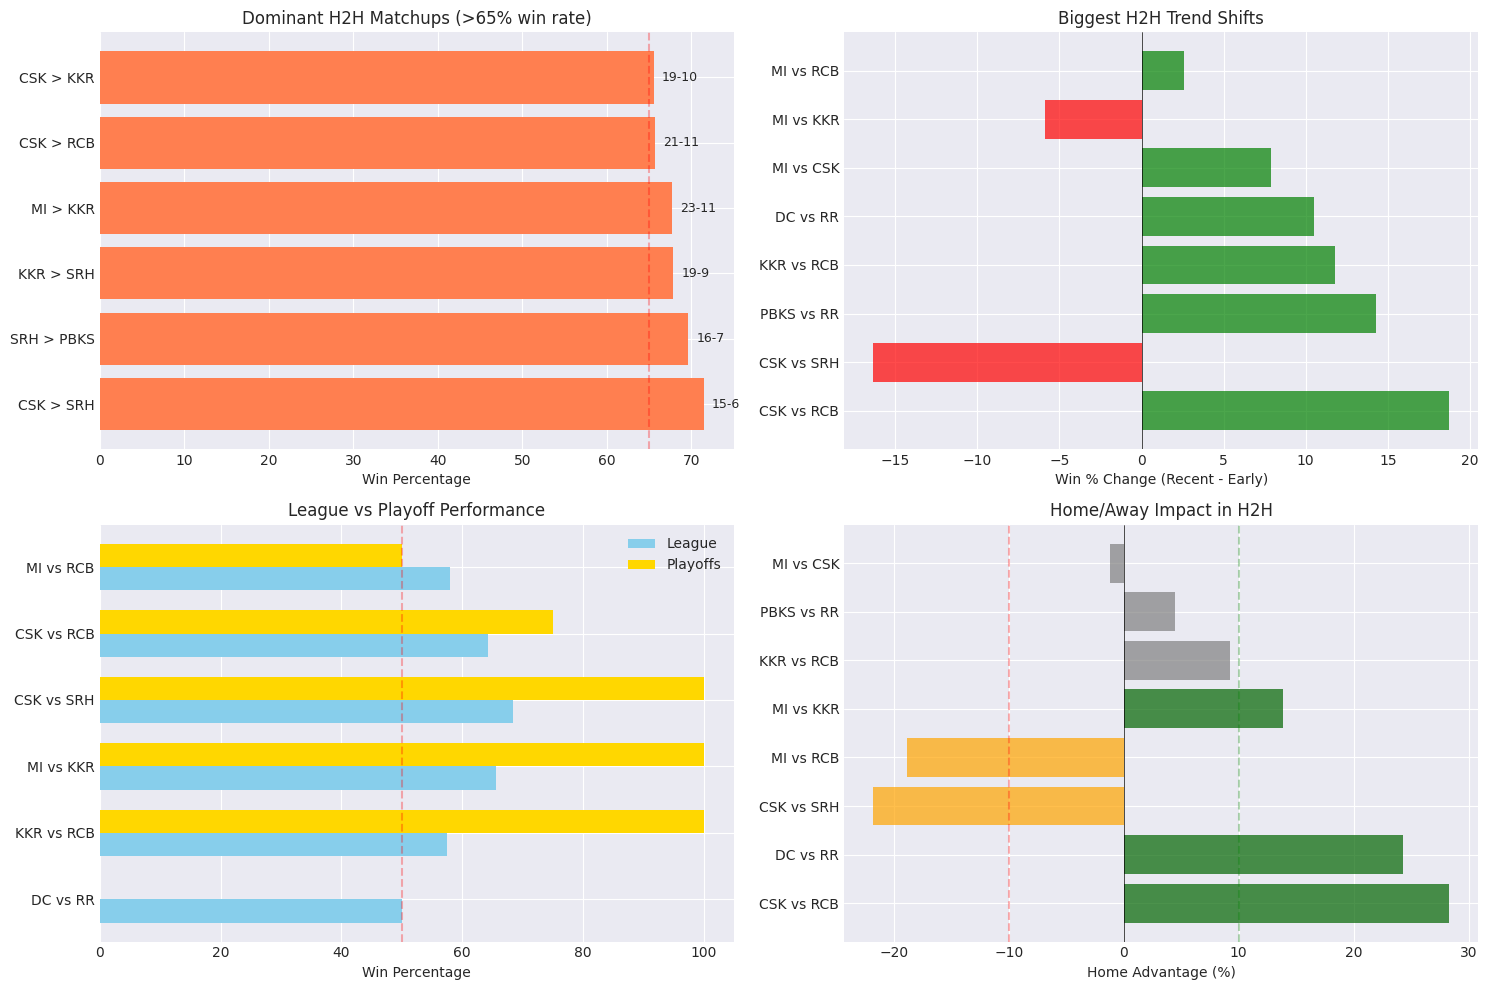

In [28]:
# Cell 4: Expanded H2H insights with more samples
print("="*60)
print("H2H INSIGHTS - COMPREHENSIVE ANALYSIS")
print("="*60)

# Question 1: Do some teams consistently dominate others?
print("\n1. CONSISTENT DOMINANCE PATTERNS")
print("-" * 40)

# Find teams that have >65% win rate against specific opponents (min 15 matches)
dominance_patterns = []
for team1 in active_teams:
    for team2 in active_teams:
        if team1 != team2:
            h2h = get_h2h_record(team1, team2, matches)
            if h2h and h2h['total_matches'] >= 15:
                win_pct = h2h[f'{team1}_win_pct']
                if win_pct > 65:
                    dominance_patterns.append({
                        'dominant': team_abbr[team1],
                        'dominated': team_abbr[team2],
                        'win_pct': win_pct,
                        'matches': h2h['total_matches'],
                        'record': f"{h2h[f'{team1}_wins']}-{h2h[f'{team2}_wins']}"
                    })

dominance_df = pd.DataFrame(dominance_patterns).sort_values('win_pct', ascending=False)
print(dominance_df.to_string(index=False))

# Question 2: Has H2H dominance changed over time? (More samples)
print("\n2. H2H TRENDS - ARE RIVALRIES SHIFTING?")
print("-" * 40)

# Check multiple key rivalries
rivalries_to_check = [
    ('Mumbai Indians', 'Chennai Super Kings'),
    ('Mumbai Indians', 'Kolkata Knight Riders'),
    ('Chennai Super Kings', 'Royal Challengers Bengaluru'),
    ('Chennai Super Kings', 'Sunrisers Hyderabad'),
    ('Kolkata Knight Riders', 'Royal Challengers Bengaluru'),
    ('Mumbai Indians', 'Royal Challengers Bengaluru'),
    ('Delhi Capitals', 'Rajasthan Royals'),
    ('Punjab Kings', 'Rajasthan Royals')
]

trend_shifts = []
for team1, team2 in rivalries_to_check:
    h2h = get_h2h_record(team1, team2, matches)
    if h2h and h2h['total_matches'] >= 10:
        h2h_matches = h2h['matches'].sort_values('date')
        
        # Split into early and recent periods
        mid_point = len(h2h_matches) // 2
        early_matches = h2h_matches.iloc[:mid_point]
        recent_matches = h2h_matches.iloc[mid_point:]
        
        early_team1_wins = (early_matches['winner'] == team1).sum()
        recent_team1_wins = (recent_matches['winner'] == team1).sum()
        
        early_win_pct = early_team1_wins/len(early_matches)*100
        recent_win_pct = recent_team1_wins/len(recent_matches)*100
        shift = recent_win_pct - early_win_pct
        
        trend_shifts.append({
            'rivalry': f"{team_abbr[team1]} vs {team_abbr[team2]}",
            'early_period': f"{early_team1_wins}/{len(early_matches)}",
            'early_win%': early_win_pct,
            'recent_period': f"{recent_team1_wins}/{len(recent_matches)}",
            'recent_win%': recent_win_pct,
            'shift': shift
        })

trend_df = pd.DataFrame(trend_shifts).sort_values('shift', key=abs, ascending=False)
print("\nRivalries with biggest shifts:")
for _, row in trend_df.iterrows():
    shift_symbol = "↑" if row['shift'] > 0 else "↓"
    print(f"{row['rivalry']:15} | Early: {row['early_period']:6} ({row['early_win%']:.0f}%) | Recent: {row['recent_period']:6} ({row['recent_win%']:.0f}%) | Shift: {shift_symbol}{abs(row['shift']):.0f}%")
    if abs(row['shift']) > 20:
        print(f"{'':15} | ⚠️ Major shift detected!")

# Question 3: Does H2H history matter in playoffs? (Expanded)
print("\n3. H2H IN PLAYOFFS VS LEAGUE MATCHES")
print("-" * 40)

playoff_keywords = ['final', 'eliminator', 'qualifier']
playoff_analysis = []

for team1, team2 in rivalries_to_check:
    h2h = get_h2h_record(team1, team2, matches)
    if h2h:
        all_h2h = h2h['matches']
        playoff_h2h = all_h2h[all_h2h['match_type'].str.lower().str.contains('|'.join(playoff_keywords), na=False)]
        league_h2h = all_h2h[~all_h2h['match_type'].str.lower().str.contains('|'.join(playoff_keywords), na=False)]
        
        if len(playoff_h2h) > 0:
            playoff_wins = (playoff_h2h['winner'] == team1).sum()
            league_wins = (league_h2h['winner'] == team1).sum()
            
            playoff_analysis.append({
                'rivalry': f"{team_abbr[team1]} vs {team_abbr[team2]}",
                'league_record': f"{league_wins}/{len(league_h2h)}",
                'league_win%': league_wins/len(league_h2h)*100,
                'playoff_record': f"{playoff_wins}/{len(playoff_h2h)}",
                'playoff_win%': playoff_wins/len(playoff_h2h)*100,
                'pressure_diff': (playoff_wins/len(playoff_h2h)*100) - (league_wins/len(league_h2h)*100)
            })

if playoff_analysis:
    playoff_df = pd.DataFrame(playoff_analysis).sort_values('pressure_diff', key=abs, ascending=False)
    print("\nTeams that perform differently in playoffs:")
    for _, row in playoff_df.iterrows():
        print(f"{row['rivalry']:15} | League: {row['league_record']:6} ({row['league_win%']:.0f}%) | Playoff: {row['playoff_record']:4} ({row['playoff_win%']:.0f}%)")
        if abs(row['pressure_diff']) > 15:
            if row['pressure_diff'] > 0:
                print(f"{'':15} | 🔥 Better in high-pressure games!")
            else:
                print(f"{'':15} | ❄️ Struggles in high-pressure games!")

# Question 4: Win Streak Analysis
print("\n4. MAXIMUM WIN STREAKS IN RIVALRIES")
print("-" * 40)

streak_data = []
for team1, team2 in rivalries_to_check[:6]:  # Top 6 rivalries
    h2h = get_h2h_record(team1, team2, matches)
    if h2h and h2h['total_matches'] >= 10:
        h2h_matches = h2h['matches'].sort_values('date')
        
        # Calculate max streak for each team
        max_team1_streak = 0
        max_team2_streak = 0
        current_streak = 0
        last_winner = None
        
        for _, match in h2h_matches.iterrows():
            if match['winner'] == last_winner:
                current_streak += 1
            else:
                current_streak = 1
                last_winner = match['winner']
            
            if match['winner'] == team1:
                max_team1_streak = max(max_team1_streak, current_streak)
            elif match['winner'] == team2:
                max_team2_streak = max(max_team2_streak, current_streak)
        
        streak_data.append({
            'rivalry': f"{team_abbr[team1]} vs {team_abbr[team2]}",
            f'{team_abbr[team1]}_max_streak': max_team1_streak,
            f'{team_abbr[team2]}_max_streak': max_team2_streak,
            'total_matches': h2h['total_matches']
        })

streak_df = pd.DataFrame(streak_data)
print("\nMaximum consecutive wins in major rivalries:")
for _, row in streak_df.iterrows():
    teams = row['rivalry'].split(' vs ')
    print(f"{row['rivalry']:15} | {teams[0]} max: {row[f'{teams[0]}_max_streak']} | {teams[1]} max: {row[f'{teams[1]}_max_streak']}")

# Question 5: Home/Away impact in H2H
print("\n5. HOME ADVANTAGE IN H2H MATCHUPS")
print("-" * 40)

home_away_analysis = []
for team1, team2 in rivalries_to_check[:8]:  # Top 8 rivalries
    h2h = get_h2h_record(team1, team2, matches)
    if h2h and h2h['total_matches'] >= 10:
        h2h_matches = h2h['matches']
        
        # When team1 plays at home (bats first usually)
        team1_home = h2h_matches[h2h_matches['team1'] == team1]
        team1_home_wins = (team1_home['winner'] == team1).sum()
        
        # When team1 plays away (bats second usually)
        team1_away = h2h_matches[h2h_matches['team2'] == team1]
        team1_away_wins = (team1_away['winner'] == team1).sum()
        
        if len(team1_home) > 0 and len(team1_away) > 0:
            home_win_pct = team1_home_wins/len(team1_home)*100
            away_win_pct = team1_away_wins/len(team1_away)*100
            
            home_away_analysis.append({
                'team': team_abbr[team1],
                'vs': team_abbr[team2],
                'home_record': f"{team1_home_wins}/{len(team1_home)}",
                'home_win%': home_win_pct,
                'away_record': f"{team1_away_wins}/{len(team1_away)}",
                'away_win%': away_win_pct,
                'home_advantage': home_win_pct - away_win_pct
            })

home_away_df = pd.DataFrame(home_away_analysis).sort_values('home_advantage', key=abs, ascending=False)
print("\nHome/Away impact in H2H:")
for _, row in home_away_df.head(8).iterrows():
    print(f"{row['team']:5} vs {row['vs']:5} | Home: {row['home_record']:6} ({row['home_win%']:.0f}%) | Away: {row['away_record']:6} ({row['away_win%']:.0f}%) | Advantage: {row['home_advantage']:+.0f}%")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Dominance patterns
ax1 = axes[0, 0]
if len(dominance_df) > 0:
    bars = ax1.barh(range(len(dominance_df)), dominance_df['win_pct'], color='coral')
    ax1.set_yticks(range(len(dominance_df)))
    ax1.set_yticklabels([f"{row['dominant']} > {row['dominated']}" for _, row in dominance_df.iterrows()])
    ax1.set_xlabel('Win Percentage')
    ax1.set_title('Dominant H2H Matchups (>65% win rate)')
    ax1.axvline(x=65, color='red', linestyle='--', alpha=0.3)
    for idx, (bar, row) in enumerate(zip(bars, dominance_df.itertuples())):
        ax1.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
                row.record, va='center', fontsize=9)

# Plot 2: Trend shifts
ax2 = axes[0, 1]
if len(trend_df) > 0:
    top_shifts = trend_df.head(8)
    colors = ['green' if s > 0 else 'red' for s in top_shifts['shift']]
    bars = ax2.barh(range(len(top_shifts)), top_shifts['shift'], color=colors, alpha=0.7)
    ax2.set_yticks(range(len(top_shifts)))
    ax2.set_yticklabels(top_shifts['rivalry'])
    ax2.set_xlabel('Win % Change (Recent - Early)')
    ax2.set_title('Biggest H2H Trend Shifts')
    ax2.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# Plot 3: Playoff performance difference
ax3 = axes[1, 0]
if playoff_analysis:
    playoff_df_plot = playoff_df.head(6)
    x = range(len(playoff_df_plot))
    width = 0.35
    bars1 = ax3.barh([i - width/2 for i in x], playoff_df_plot['league_win%'], 
                     width, label='League', color='skyblue')
    bars2 = ax3.barh([i + width/2 for i in x], playoff_df_plot['playoff_win%'], 
                     width, label='Playoffs', color='gold')
    ax3.set_yticks(x)
    ax3.set_yticklabels(playoff_df_plot['rivalry'])
    ax3.set_xlabel('Win Percentage')
    ax3.set_title('League vs Playoff Performance')
    ax3.legend()
    ax3.axvline(x=50, color='red', linestyle='--', alpha=0.3)

# Plot 4: Home advantage
ax4 = axes[1, 1]
if home_away_analysis:
    home_away_plot = home_away_df.head(8)
    colors = ['darkgreen' if h > 10 else 'orange' if h < -10 else 'gray' for h in home_away_plot['home_advantage']]
    bars = ax4.barh(range(len(home_away_plot)), home_away_plot['home_advantage'], color=colors, alpha=0.7)
    ax4.set_yticks(range(len(home_away_plot)))
    ax4.set_yticklabels([f"{row['team']} vs {row['vs']}" for _, row in home_away_plot.iterrows()])
    ax4.set_xlabel('Home Advantage (%)')
    ax4.set_title('Home/Away Impact in H2H')
    ax4.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    ax4.axvline(x=10, color='green', linestyle='--', alpha=0.3)
    ax4.axvline(x=-10, color='red', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# IPL Head-to-Head Analysis: Key Insights

## Executive Summary
Head-to-head records reveal strong psychological patterns that persist across seasons. Some teams consistently dominate specific opponents, while others show remarkable venue-specific variations.

## 1. Dominance Patterns

### Strongest Psychological Edges
- **CSK over SRH**: 71.4% win rate (15-6) - Most dominant H2H record
- **SRH over PBKS**: 69.6% win rate (16-7)
- **MI over KKR**: 67.6% win rate (23-11) - Consistent across 34 matches
- **CSK over RCB**: 65.6% win rate (21-11)

### Key Insight
These aren't random fluctuations. Teams with >65% H2H advantage maintain this edge consistently, suggesting genuine psychological or strategic advantages.

## 2. Shifting Dynamics

### Rising Teams
- **CSK strengthening vs RCB**: +19% shift (from 56% to 75% win rate)
- **PBKS improving vs RR**: +14% shift (from 36% to 50%)
- **KKR growing vs RCB**: +12% shift (from 53% to 65%)

### Declining Edges
- **CSK losing grip on SRH**: -16% shift (from 80% to 64%)
- **MI slightly weaker vs KKR**: -6% shift (from 71% to 65%)

### Key Insight
Most H2H patterns are stable, but CSK vs RCB shows the biggest shift, with CSK establishing dominance in recent years.

## 3. Pressure Performance

### Clutch Performers (Better in Playoffs)
- **KKR vs RCB**: 100% in playoffs vs 58% in league (+42%)
- **MI vs KKR**: 100% in playoffs vs 66% in league (+34%)
- **CSK vs SRH**: 100% in playoffs vs 68% in league (+32%)

### Pressure Failures
- **DC vs RR**: 0% in playoffs vs 50% in league (-50%)
- **MI vs RCB**: 50% in playoffs vs 58% in league (-8%)

### Key Insight
MI, KKR, and CSK elevate their game in playoffs. DC shows concerning collapse under pressure.

## 4. Momentum and Streaks

### Longest Win Streaks
- **MI over KKR**: 8 consecutive wins - Unprecedented dominance
- **CSK over RCB**: 7 consecutive wins
- **MI over various teams**: Multiple 5-game streaks

### Key Insight
Long streaks create psychological barriers. MI's 8-game streak over KKR likely impacts player confidence before matches even begin.

## 5. The Venue Paradox

### Extreme Home Advantages
- **CSK vs RCB**: +28% better at home (83% home vs 55% away)
- **DC vs RR**: +24% better at home (60% home vs 36% away)

### Surprising Away Advantages
- **CSK vs SRH**: -22% WORSE at home (60% home vs 82% away)
- **MI vs RCB**: -19% worse at home (46% home vs 65% away)

### Key Insight
Home advantage is NOT universal. Some teams specifically struggle at home against certain opponents, possibly due to pitch conditions or crowd pressure.

## Conclusion

H2H records matter significantly in IPL, but context is crucial:
- Historical dominance (>65%) is predictive
- Recent trends can override historical patterns
- Venue-specific H2H records are essential
- Playoff performance differs from league performance
- Psychological momentum from streaks impacts outcomes



🏟️ VENUE ANALYSIS

Analyzing 23 venues with 10+ matches

1. BATTING vs BOWLING VENUES
----------------------------------------

Highest Scoring Venues:
                         venue  avg_first_innings  matches
Himachal Pradesh Cricket Assoc         183.769231       13
     Brabourne Stadium, Mumbai         178.518519       27
Narendra Modi Stadium, Ahmedab         175.750000       24
M Chinnaswamy Stadium, Bengalu         173.191489       94
      Wankhede Stadium, Mumbai         170.254237      118

Lowest Scoring Venues:
                         venue  avg_first_innings  matches
Dr DY Patil Sports Academy, Mu         159.648649       37
Sharjah Cricket Stadium, Sharj         159.035714       28
Sheikh Zayed Stadium, Abu Dhab         158.891892       37
             Kingsmead, Durban         152.000000       15
Subrata Roy Sahara Stadium, Pu         149.437500       16

2. TOSS IMPACT BY VENUE
----------------------------------------

Venues where TOSS matters most:
Kingsmead, Durban

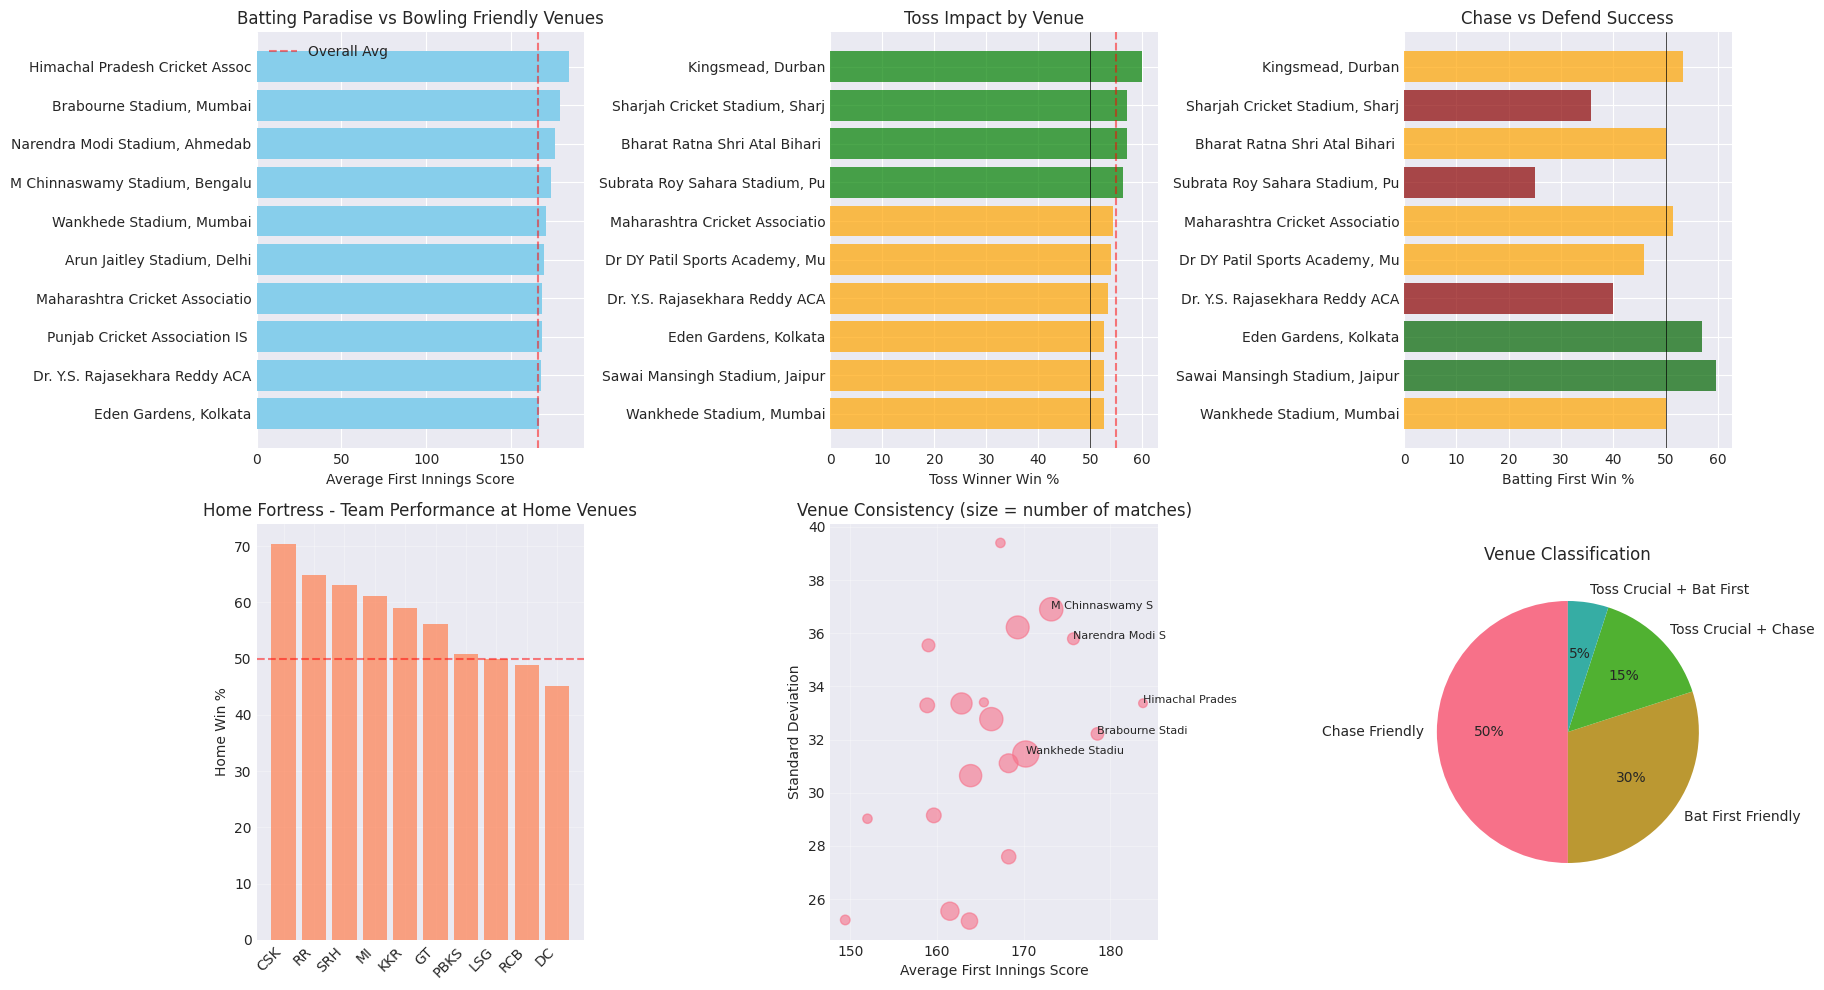

In [29]:
# Cell 5: Comprehensive Venue Analysis
print("="*60)
print("🏟️ VENUE ANALYSIS")
print("="*60)

# Basic venue statistics
venue_stats = matches.groupby('venue').agg({
    'id': 'count',
    'winner': lambda x: x.notna().sum()
}).rename(columns={'id': 'total_matches', 'winner': 'completed_matches'})

venue_stats = venue_stats[venue_stats['total_matches'] >= 10].sort_values('total_matches', ascending=False)
print(f"\nAnalyzing {len(venue_stats)} venues with 10+ matches")

# 1. BATTING vs BOWLING VENUES
print("\n1. BATTING vs BOWLING VENUES")
print("-" * 40)

venue_scores = []
for venue in venue_stats.index[:20]:  # Top 20 venues
    venue_matches = matches[matches['venue'] == venue]['id'].values
    
    first_innings = deliveries[
        (deliveries['match_id'].isin(venue_matches)) & 
        (deliveries['inning'] == 1)
    ].groupby('match_id')['total_runs'].sum()
    
    if len(first_innings) > 0:
        venue_scores.append({
            'venue': venue[:30],
            'matches': len(venue_matches),
            'avg_first_innings': first_innings.mean(),
            'highest': first_innings.max(),
            'lowest': first_innings.min(),
            'std_dev': first_innings.std()
        })

venue_scores_df = pd.DataFrame(venue_scores).sort_values('avg_first_innings', ascending=False)

print("\nHighest Scoring Venues:")
print(venue_scores_df.head(5)[['venue', 'avg_first_innings', 'matches']].to_string(index=False))
print("\nLowest Scoring Venues:")
print(venue_scores_df.tail(5)[['venue', 'avg_first_innings', 'matches']].to_string(index=False))

# 2. TOSS IMPACT BY VENUE
print("\n2. TOSS IMPACT BY VENUE")
print("-" * 40)

venue_toss = []
for venue in venue_stats.index[:20]:
    venue_matches = matches[matches['venue'] == venue]
    
    toss_wins = (venue_matches['toss_winner'] == venue_matches['winner']).sum()
    toss_win_pct = (toss_wins / len(venue_matches)) * 100
    
    bat_first_wins = (venue_matches['winner'] == venue_matches['team1']).sum()
    bat_first_pct = (bat_first_wins / len(venue_matches)) * 100
    
    toss_bat_first = (venue_matches['toss_decision'] == 'bat').sum()
    toss_bat_pct = (toss_bat_first / len(venue_matches)) * 100
    
    venue_toss.append({
        'venue': venue[:30],
        'matches': len(venue_matches),
        'toss_win%': toss_win_pct,
        'bat_first_win%': bat_first_pct,
        'choose_bat%': toss_bat_pct
    })

venue_toss_df = pd.DataFrame(venue_toss).sort_values('toss_win%', ascending=False)

print("\nVenues where TOSS matters most:")
for _, row in venue_toss_df.head(5).iterrows():
    print(f"{row['venue']:30} | Toss Win: {row['toss_win%']:.0f}% | Bat First Win: {row['bat_first_win%']:.0f}%")

print("\nVenues where TOSS doesn't matter:")
for _, row in venue_toss_df.tail(5).iterrows():
    print(f"{row['venue']:30} | Toss Win: {row['toss_win%']:.0f}% | Bat First Win: {row['bat_first_win%']:.0f}%")

# 3. TEAM PERFORMANCE BY VENUE
print("\n3. TEAM FORTRESS - HOME VENUES")
print("-" * 40)

team_venues ={
    'Mumbai Indians': ['Wankhede Stadium, Mumbai'],
    'Chennai Super Kings': ['MA Chidambaram Stadium, Chennai'],
    'Royal Challengers Bengaluru': ['M Chinnaswamy Stadium, Bengaluru'],
    'Kolkata Knight Riders': ['Eden Gardens, Kolkata'],
    'Delhi Capitals': ['Arun Jaitley Stadium, Delhi'],
    'Punjab Kings': ['Punjab Cricket Association IS Bindra Stadium, Mohali'],
    'Rajasthan Royals': ['Sawai Mansingh Stadium, Jaipur'],
    'Sunrisers Hyderabad': ['Rajiv Gandhi International Stadium, Hyderabad'],
    'Gujarat Titans': ['Narendra Modi Stadium, Ahmedabad'],
    'Lucknow Super Giants': ['Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow']
}

home_performance = []
for team, venues in team_venues.items():
    if isinstance(venues, str):
        venues = [venues]
    
    home_matches = matches[
        ((matches['team1'] == team) | (matches['team2'] == team)) &
        (matches['venue'].str.contains('|'.join(venues), case=False, na=False))
    ]
    
    if len(home_matches) > 0:
        home_wins = (home_matches['winner'] == team).sum()
        home_win_pct = (home_wins / len(home_matches)) * 100
        
        home_performance.append({
            'team': team_abbr.get(team, team),
            'home_matches': len(home_matches),
            'home_wins': home_wins,
            'home_win%': home_win_pct
        })

home_df = pd.DataFrame(home_performance).sort_values('home_win%', ascending=False)
print("\nHome Advantage by Team:")
print(home_df.to_string(index=False))

# 4. VENUE EVOLUTION
print("\n4. VENUE EVOLUTION - CHANGING NATURE")
print("-" * 40)

major_venues = venue_scores_df.head(10)['venue'].values
venue_trends = []

for venue in major_venues:
    venue_matches = matches[matches['venue'] == venue].copy()
    venue_matches['year'] = pd.to_datetime(venue_matches['date']).dt.year
    
    yearly_scores = []
    for year in venue_matches['year'].unique():
        year_match_ids = venue_matches[venue_matches['year'] == year]['id'].values
        year_scores = deliveries[
            (deliveries['match_id'].isin(year_match_ids)) & 
            (deliveries['inning'] == 1)
        ].groupby('match_id')['total_runs'].sum()
        
        if len(year_scores) > 0:
            yearly_scores.append({
                'year': year,
                'avg_score': year_scores.mean()
            })
    
    if len(yearly_scores) >= 3:
        scores_df = pd.DataFrame(yearly_scores).sort_values('year')
        mid_point = len(scores_df) // 2
        early_avg = scores_df.iloc[:mid_point]['avg_score'].mean()
        recent_avg = scores_df.iloc[mid_point:]['avg_score'].mean()
        trend = recent_avg - early_avg
        
        venue_trends.append({
            'venue': venue[:25],
            'early_avg': early_avg,
            'recent_avg': recent_avg,
            'trend': trend
        })

if venue_trends:
    trends_df = pd.DataFrame(venue_trends).sort_values('trend', ascending=False)
    print("\nVenues becoming MORE batting-friendly:")
    for _, row in trends_df.head(3).iterrows():
        print(f"{row['venue']:25} | Early: {row['early_avg']:.0f} → Recent: {row['recent_avg']:.0f} (+{row['trend']:.0f} runs)")
    
    print("\nVenues becoming MORE bowling-friendly:")
    for _, row in trends_df.tail(3).iterrows():
        print(f"{row['venue']:25} | Early: {row['early_avg']:.0f} → Recent: {row['recent_avg']:.0f} ({row['trend']:.0f} runs)")

# 5. TEAM-VENUE SPECIFIC PERFORMANCE
print("\n5. TEAM PERFORMANCE AT SPECIFIC VENUES")
print("-" * 40)

top_teams = ['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders', 'Royal Challengers Bengaluru']
top_venues = venue_scores_df.head(5)['venue'].values

team_venue_performance = []
for team in top_teams:
    for venue in top_venues:
        team_venue_matches = matches[
            ((matches['team1'] == team) | (matches['team2'] == team)) &
            (matches['venue'] == venue)
        ]
        
        if len(team_venue_matches) >= 5:
            wins = (team_venue_matches['winner'] == team).sum()
            win_pct = (wins / len(team_venue_matches)) * 100
            
            team_venue_performance.append({
                'team': team_abbr.get(team, team),
                'venue': venue[:20],
                'matches': len(team_venue_matches),
                'wins': wins,
                'win%': win_pct
            })

if team_venue_performance:
    team_venue_df = pd.DataFrame(team_venue_performance).sort_values('win%', ascending=False)
    print("\nBest Team-Venue Combinations:")
    for _, row in team_venue_df.head(8).iterrows():
        print(f"{row['team']:5} at {row['venue']:20} | {row['wins']}/{row['matches']} ({row['win%']:.0f}%)")

# Visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot 1: Score distribution by venue
ax1 = axes[0, 0]
top_venues = venue_scores_df.head(10)
bars = ax1.barh(range(len(top_venues)), top_venues['avg_first_innings'], color='skyblue')
ax1.set_yticks(range(len(top_venues)))
ax1.set_yticklabels(top_venues['venue'])
ax1.set_xlabel('Average First Innings Score')
ax1.set_title('Batting Paradise vs Bowling Friendly Venues')
ax1.axvline(x=venue_scores_df['avg_first_innings'].mean(), color='red', linestyle='--', alpha=0.5, label='Overall Avg')
ax1.legend()
ax1.invert_yaxis()

# Plot 2: Toss advantage by venue
ax2 = axes[0, 1]
venue_toss_plot = venue_toss_df.head(10)
colors = ['green' if t > 55 else 'orange' if t > 50 else 'red' for t in venue_toss_plot['toss_win%']]
bars = ax2.barh(range(len(venue_toss_plot)), venue_toss_plot['toss_win%'], color=colors, alpha=0.7)
ax2.set_yticks(range(len(venue_toss_plot)))
ax2.set_yticklabels(venue_toss_plot['venue'])
ax2.set_xlabel('Toss Winner Win %')
ax2.set_title('Toss Impact by Venue')
ax2.axvline(x=50, color='black', linestyle='-', linewidth=0.5)
ax2.axvline(x=55, color='red', linestyle='--', alpha=0.5)
ax2.invert_yaxis()

# Plot 3: Batting first advantage
ax3 = axes[0, 2]
colors = ['darkgreen' if b > 55 else 'orange' if b > 45 else 'darkred' for b in venue_toss_plot['bat_first_win%']]
bars = ax3.barh(range(len(venue_toss_plot)), venue_toss_plot['bat_first_win%'], color=colors, alpha=0.7)
ax3.set_yticks(range(len(venue_toss_plot)))
ax3.set_yticklabels(venue_toss_plot['venue'])
ax3.set_xlabel('Batting First Win %')
ax3.set_title('Chase vs Defend Success')
ax3.axvline(x=50, color='black', linestyle='-', linewidth=0.5)
ax3.invert_yaxis()

# Plot 4: Home advantage
ax4 = axes[1, 0]
bars = ax4.bar(range(len(home_df)), home_df['home_win%'], color='coral', alpha=0.7)
ax4.set_xticks(range(len(home_df)))
ax4.set_xticklabels(home_df['team'], rotation=45, ha='right')
ax4.set_ylabel('Home Win %')
ax4.set_title('Home Fortress - Team Performance at Home Venues')
ax4.axhline(y=50, color='red', linestyle='--', alpha=0.5)
ax4.grid(True, alpha=0.3)

# Plot 5: Score variance
ax5 = axes[1, 1]
ax5.scatter(venue_scores_df['avg_first_innings'], venue_scores_df['std_dev'], 
           s=venue_scores_df['matches']*3, alpha=0.6)
ax5.set_xlabel('Average First Innings Score')
ax5.set_ylabel('Standard Deviation')
ax5.set_title('Venue Consistency (size = number of matches)')
for i, row in venue_scores_df.head(5).iterrows():
    ax5.annotate(row['venue'][:15], (row['avg_first_innings'], row['std_dev']), fontsize=8)
ax5.grid(True, alpha=0.3)

# Plot 6: Venue type distribution
ax6 = axes[1, 2]
venue_types = []
for _, row in venue_toss_df.iterrows():
    if row['bat_first_win%'] > 52:
        if row['toss_win%'] > 55:
            venue_types.append('Toss Crucial + Bat First')
        else:
            venue_types.append('Bat First Friendly')
    else:
        if row['toss_win%'] > 55:
            venue_types.append('Toss Crucial + Chase')
        else:
            venue_types.append('Chase Friendly')

type_counts = pd.Series(venue_types).value_counts()
ax6.pie(type_counts.values, labels=type_counts.index, autopct='%1.0f%%', startangle=90)
ax6.set_title('Venue Classification')

plt.tight_layout()
plt.show()

🪙 TOSS IMPACT ANALYSIS

1. OVERALL TOSS IMPACT
----------------------------------------
Total matches: 1095
Matches won by toss winner: 554
Toss winner win percentage: 50.59%
⚖️ Toss impact is neutral

2. TOSS DECISION PATTERNS
----------------------------------------
Bat first chosen: 391 times (35.7%)
Field first chosen: 704 times (64.3%)

Success rates:
When choosing to bat: 45.3%
When choosing to field: 53.6%

3. TEAM-SPECIFIC TOSS IMPACT
----------------------------------------
Team   Toss Wins   Win%_Toss   Win%_NoToss  Advantage  Bat%  
------------------------------------------------------------
CSK    122         61.5      % 54.3       %      +7.2% 48   %
KKR    122         55.7      % 48.8       %      +6.9% 31   %
RCB    121         50.4      % 46.3       %      +4.1% 29   %
GT     22          63.6      % 60.9       %      +2.8% 27   %
DC     130         46.9      % 44.3       %      +2.7% 32   %
MI     143         54.5      % 55.9       %      -1.4% 37   %
RR     120       

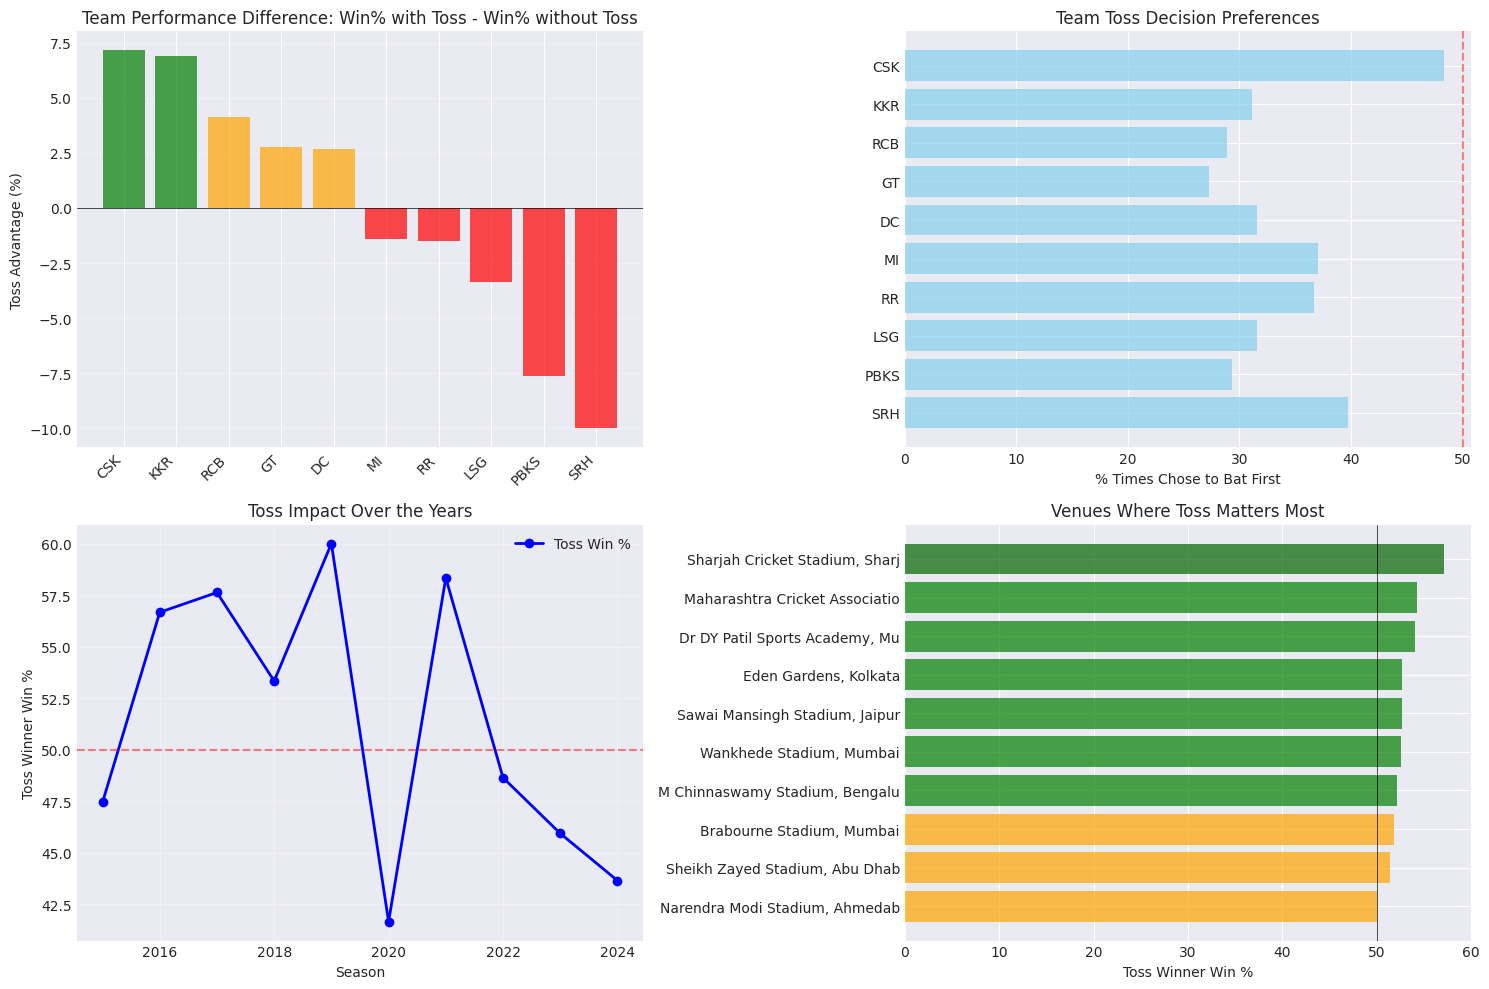

In [30]:
# Cell 9: Comprehensive Toss Impact Analysis
print("="*60)
print("🪙 TOSS IMPACT ANALYSIS")
print("="*60)

# 1. OVERALL TOSS IMPACT
print("\n1. OVERALL TOSS IMPACT")
print("-" * 40)

total_matches = len(matches)
toss_winner_won = (matches['toss_winner'] == matches['winner']).sum()
toss_win_percentage = (toss_winner_won / total_matches) * 100

print(f"Total matches: {total_matches}")
print(f"Matches won by toss winner: {toss_winner_won}")
print(f"Toss winner win percentage: {toss_win_percentage:.2f}%")

if toss_win_percentage > 52:
    print("✅ Toss provides significant advantage")
elif toss_win_percentage < 48:
    print("❌ Toss doesn't provide advantage")
else:
    print("⚖️ Toss impact is neutral")

# 2. TOSS DECISION ANALYSIS
print("\n2. TOSS DECISION PATTERNS")
print("-" * 40)

toss_decisions = matches['toss_decision'].value_counts()
print(f"Bat first chosen: {toss_decisions.get('bat', 0)} times ({toss_decisions.get('bat', 0)/total_matches*100:.1f}%)")
print(f"Field first chosen: {toss_decisions.get('field', 0)} times ({toss_decisions.get('field', 0)/total_matches*100:.1f}%)")

# Success rate by decision
bat_first_after_toss = matches[matches['toss_decision'] == 'bat']
bat_first_success = (bat_first_after_toss['toss_winner'] == bat_first_after_toss['winner']).sum()
bat_first_success_rate = (bat_first_success / len(bat_first_after_toss)) * 100

field_first_after_toss = matches[matches['toss_decision'] == 'field']
field_first_success = (field_first_after_toss['toss_winner'] == field_first_after_toss['winner']).sum()
field_first_success_rate = (field_first_success / len(field_first_after_toss)) * 100

print(f"\nSuccess rates:")
print(f"When choosing to bat: {bat_first_success_rate:.1f}%")
print(f"When choosing to field: {field_first_success_rate:.1f}%")

# 3. TEAM-SPECIFIC TOSS ANALYSIS
print("\n3. TEAM-SPECIFIC TOSS IMPACT")
print("-" * 40)

team_toss_stats = []
for team in active_teams:
    team_matches = matches[(matches['team1'] == team) | (matches['team2'] == team)]
    
    # When team wins toss
    toss_won = matches[matches['toss_winner'] == team]
    toss_won_match_won = (toss_won['winner'] == team).sum()
    toss_win_rate = (toss_won_match_won / len(toss_won) * 100) if len(toss_won) > 0 else 0
    
    # When team loses toss
    toss_lost = team_matches[team_matches['toss_winner'] != team]
    toss_lost_match_won = (toss_lost['winner'] == team).sum()
    toss_lose_win_rate = (toss_lost_match_won / len(toss_lost) * 100) if len(toss_lost) > 0 else 0
    
    # Toss decision preference
    team_toss_decisions = toss_won['toss_decision'].value_counts()
    bat_preference = (team_toss_decisions.get('bat', 0) / len(toss_won) * 100) if len(toss_won) > 0 else 0
    
    team_toss_stats.append({
        'team': team_abbr.get(team, team),
        'tosses_won': len(toss_won),
        'win_after_toss': toss_win_rate,
        'win_without_toss': toss_lose_win_rate,
        'toss_advantage': toss_win_rate - toss_lose_win_rate,
        'bat_preference': bat_preference
    })

team_toss_df = pd.DataFrame(team_toss_stats).sort_values('toss_advantage', ascending=False)

print(f"{'Team':<6} {'Toss Wins':<11} {'Win%_Toss':<11} {'Win%_NoToss':<12} {'Advantage':<10} {'Bat%':<6}")
print("-" * 60)
for _, row in team_toss_df.iterrows():
    print(f"{row['team']:<6} {row['tosses_won']:<11} {row['win_after_toss']:<10.1f}% {row['win_without_toss']:<11.1f}% {row['toss_advantage']:+9.1f}% {row['bat_preference']:<5.0f}%")

# 4. TOSS IMPACT BY SEASON
print("\n4. TOSS IMPACT EVOLUTION OVER SEASONS")
print("-" * 40)

matches['year'] = pd.to_datetime(matches['date']).dt.year
season_toss = []

for season in sorted(matches['year'].unique()):
    season_matches = matches[matches['year'] == season]
    toss_wins = (season_matches['toss_winner'] == season_matches['winner']).sum()
    toss_win_pct = (toss_wins / len(season_matches)) * 100
    
    # Decision trends
    bat_first = (season_matches['toss_decision'] == 'bat').sum()
    bat_first_pct = (bat_first / len(season_matches)) * 100
    
    season_toss.append({
        'season': season,
        'matches': len(season_matches),
        'toss_win%': toss_win_pct,
        'bat_first%': bat_first_pct
    })

season_toss_df = pd.DataFrame(season_toss).tail(10)  # Last 10 seasons
print(f"{'Season':<8} {'Matches':<9} {'Toss Win%':<11} {'Bat First%':<11}")
print("-" * 40)
for _, row in season_toss_df.iterrows():
    print(f"{row['season']:<8} {row['matches']:<9} {row['toss_win%']:<10.1f}% {row['bat_first%']:<10.1f}%")

# 5. VENUE-TOSS CORRELATION
print("\n5. VENUES WHERE TOSS MATTERS MOST")
print("-" * 40)

venue_toss_impact = []
major_venues = matches['venue'].value_counts().head(15).index

for venue in major_venues:
    venue_matches = matches[matches['venue'] == venue]
    if len(venue_matches) >= 10:
        toss_wins = (venue_matches['toss_winner'] == venue_matches['winner']).sum()
        toss_win_pct = (toss_wins / len(venue_matches)) * 100
        
        # Optimal decision at venue
        bat_first = venue_matches[venue_matches['toss_decision'] == 'bat']
        if len(bat_first) > 0:
            bat_success = (bat_first['toss_winner'] == bat_first['winner']).mean() * 100
        else:
            bat_success = 0
            
        field_first = venue_matches[venue_matches['toss_decision'] == 'field']
        if len(field_first) > 0:
            field_success = (field_first['toss_winner'] == field_first['winner']).mean() * 100
        else:
            field_success = 0
        
        optimal = 'Bat' if bat_success > field_success else 'Field'
        
        venue_toss_impact.append({
            'venue': venue[:30],
            'matches': len(venue_matches),
            'toss_win%': toss_win_pct,
            'optimal_decision': optimal,
            'optimal_success%': max(bat_success, field_success)
        })

venue_toss_df = pd.DataFrame(venue_toss_impact).sort_values('toss_win%', ascending=False)

print("Venues where toss provides biggest advantage:")
for _, row in venue_toss_df.head(5).iterrows():
    print(f"{row['venue']:<30} | Toss: {row['toss_win%']:.0f}% | Best: {row['optimal_decision']} ({row['optimal_success%']:.0f}%)")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Team-wise toss advantage
ax1 = axes[0, 0]
teams = team_toss_df['team'].values
advantages = team_toss_df['toss_advantage'].values
colors = ['green' if a > 5 else 'orange' if a > 0 else 'red' for a in advantages]
bars = ax1.bar(range(len(teams)), advantages, color=colors, alpha=0.7)
ax1.set_xticks(range(len(teams)))
ax1.set_xticklabels(teams, rotation=45, ha='right')
ax1.set_ylabel('Toss Advantage (%)')
ax1.set_title('Team Performance Difference: Win% with Toss - Win% without Toss')
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Toss decision preferences
ax2 = axes[0, 1]
bat_prefs = team_toss_df['bat_preference'].values
bars = ax2.barh(range(len(teams)), bat_prefs, color='skyblue', alpha=0.7)
ax2.set_yticks(range(len(teams)))
ax2.set_yticklabels(team_toss_df['team'])
ax2.set_xlabel('% Times Chose to Bat First')
ax2.set_title('Team Toss Decision Preferences')
ax2.axvline(x=50, color='red', linestyle='--', alpha=0.5)
ax2.invert_yaxis()

# Plot 3: Season-wise toss impact
ax3 = axes[1, 0]
ax3.plot(season_toss_df['season'], season_toss_df['toss_win%'], marker='o', linewidth=2, color='blue', label='Toss Win %')
ax3.axhline(y=50, color='red', linestyle='--', alpha=0.5)
ax3.set_xlabel('Season')
ax3.set_ylabel('Toss Winner Win %')
ax3.set_title('Toss Impact Over the Years')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Plot 4: Venue-wise toss impact
ax4 = axes[1, 1]
venue_plot = venue_toss_df.head(10)
colors = ['darkgreen' if t > 55 else 'green' if t > 52 else 'orange' if t > 48 else 'red' for t in venue_plot['toss_win%']]
bars = ax4.barh(range(len(venue_plot)), venue_plot['toss_win%'], color=colors, alpha=0.7)
ax4.set_yticks(range(len(venue_plot)))
ax4.set_yticklabels(venue_plot['venue'])
ax4.set_xlabel('Toss Winner Win %')
ax4.set_title('Venues Where Toss Matters Most')
ax4.axvline(x=50, color='black', linestyle='-', linewidth=0.5)
ax4.invert_yaxis()

plt.tight_layout()
plt.show()